In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# Importing Keras library
from PIL import Image
import cv2

#importing the keres libraries
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [3]:
DATA_DIR="D:/MLDeploy/malaria/train/"
dataset=[]
label=[]

In [4]:
parasitized_images=os.listdir(DATA_DIR + 'Parasitized/')
for i,image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1]=="png"):
            image=cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image=Image.fromarray(image,"RGB")
            image=image.resize((64,64))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        None
        

In [5]:
uninfected_images=os.listdir(DATA_DIR + 'Uninfected/')
for i,image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1]=="png"):
            image=cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image=Image.fromarray(image,"RGB")
            image=image.resize((64,64))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        None

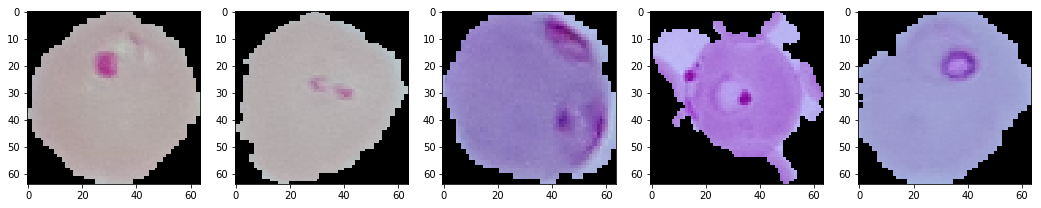

In [6]:
#visualizing the Parasitized images. 
plt.figure(figsize=(18,12))
for index,image_index in enumerate(np.random.randint(len(parasitized_images),size=5)):
    plt.subplot(1,5,index+1)
    plt.imshow(dataset[image_index])

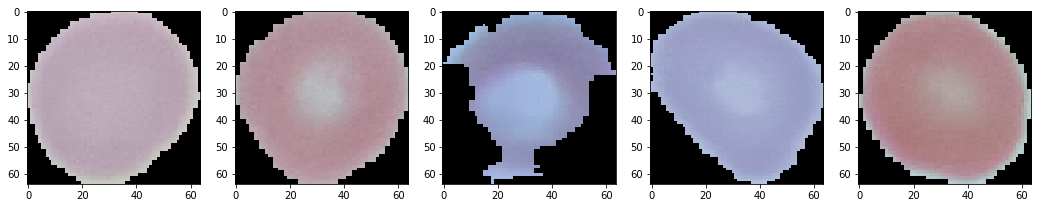

In [7]:
#visualizing the uninfected images.
plt.figure(figsize=(18,12))
for index,image_index in enumerate(np.random.randint(len(uninfected_images),size=5)):
    plt.subplot(1,5,index+1)
    plt.imshow(dataset[len(parasitized_images)+image_index])

In [8]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.30,random_state=123)

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(train_X),
                                       train_y,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(test_X),
                                     test_y,
                                     batch_size = 64,
                                     shuffle = False)

In [10]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [11]:
history=model.fit(train_generator,validation_data=test_generator,epochs=10,verbose=1,shuffle=False)

Epoch 1/10
302/302 [==============================] - 83s 273ms/step - loss: 0.5254 - accuracy: 0.7417 - val_loss: 2.8940 - val_accuracy: 0.4990
Epoch 2/10
302/302 [==============================] - 81s 268ms/step - loss: 0.2901 - accuracy: 0.8940 - val_loss: 0.2458 - val_accuracy: 0.8342
Epoch 3/10
302/302 [==============================] - 81s 270ms/step - loss: 0.2413 - accuracy: 0.9108 - val_loss: 1.9045 - val_accuracy: 0.6079
Epoch 4/10
302/302 [==============================] - 82s 270ms/step - loss: 0.2246 - accuracy: 0.9188 - val_loss: 0.0090 - val_accuracy: 0.9542
Epoch 5/10
302/302 [==============================] - 86s 284ms/step - loss: 0.2110 - accuracy: 0.9267 - val_loss: 0.0172 - val_accuracy: 0.9446
Epoch 6/10
302/302 [==============================] - 82s 270ms/step - loss: 0.1999 - accuracy: 0.9291 - val_loss: 0.0380 - val_accuracy: 0.9441
Epoch 7/10
302/302 [==============================] - 82s 272ms/step - loss: 0.1875 - accuracy: 0.9344 - val_loss: 0.0085 - val_ac

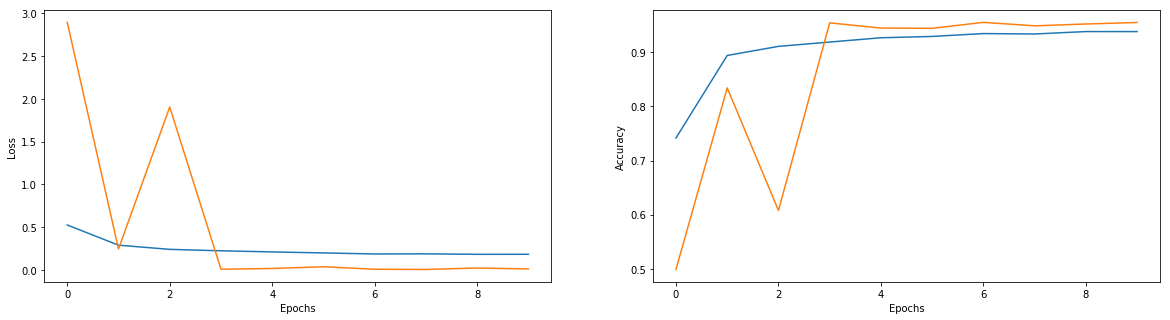

In [12]:
#Plotiing the Loss and Accuracy of our Model.
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

In [13]:
# save it as a h5 file
from keras.models import load_model

model.save('model_cnn.h5')

In [14]:
y_pred=model.predict(test_generator)

In [15]:
y_pred

array([[0.91254705, 0.00173163],
       [0.0091483 , 0.9897517 ],
       [0.5508274 , 0.9974512 ],
       ...,
       [0.9790982 , 0.00541583],
       [0.80116683, 0.0106245 ],
       [0.05256751, 0.93650234]], dtype=float32)

In [16]:
y_pred=np.argmax(y_pred,axis=1)

In [17]:
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [18]:
from keras.preprocessing import image

In [19]:
img=image.load_img('C:/Users/sandeep/Desktop/data/10.png',target_size=(64,64))

In [20]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [21]:
x.shape

(64, 64, 3)

In [22]:
x=x/255

In [23]:
x=np.expand_dims(x,axis=0)

x.shape

(1, 64, 64, 3)

In [24]:
model.predict_classes(x)

array([1], dtype=int64)

In [26]:
import os
print(os.getcwd())

C:\Users\sandeep\Downloads
